<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate rectangle detection.

In [1]:
# Import all necessary libraries.
import os
import sys
import json
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

In [2]:
# Load default configuration file.
with open('../config/default.json') as data_file:
    config = json.load(data_file)
    
sys.path.append(os.path.abspath(config["NOMEROFF_NET"]["ROOT"]))

In [3]:
# Import license plate recognition tools.
from NomeroffNet import Detector, filters, RectDetector

Using TensorFlow backend.


In [4]:
# Initialize rect detector with default configuration file.
rectDetector = RectDetector(config["RECT_DETECTOR"])
# Initialize npdetector with default configuration file.
nnet = Detector(config)
# Load weights in keras format.
nnet.loadModel()

/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


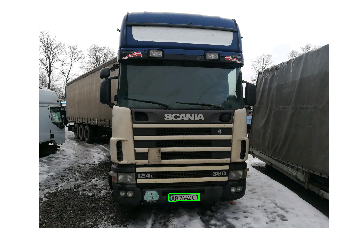

In [5]:
# Walking through the ./examples/images/ directory and checking each of the images for license plates.
rootDir = 'images/'

for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        img_path = os.path.join(dirName, fname)
        img = mpimg.imread(img_path)

        np = nnet.detect([img])
        
        # Generate image mask.
        cv_img_masks = filters.cv_img_mask(np)
        
       
        for img_mask in cv_img_masks:
            # Detect points.
            points = rectDetector.detect(img_mask, 0)
            
            # Show detected rect.
            filters.draw_box(img, points, (0, 255, 0), 3)
        plt.axis("off")
        plt.imshow(img)
        plt.show()